<a href="https://colab.research.google.com/github/Breb1s/PUC/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import skimage as sk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte
file_path = '/content/drive/MyDrive/PUC/Christian/Camera.jpg'
I2 = sk.io.imread(file_path) # read image using imread function
I2.shape

(720, 1280, 3)

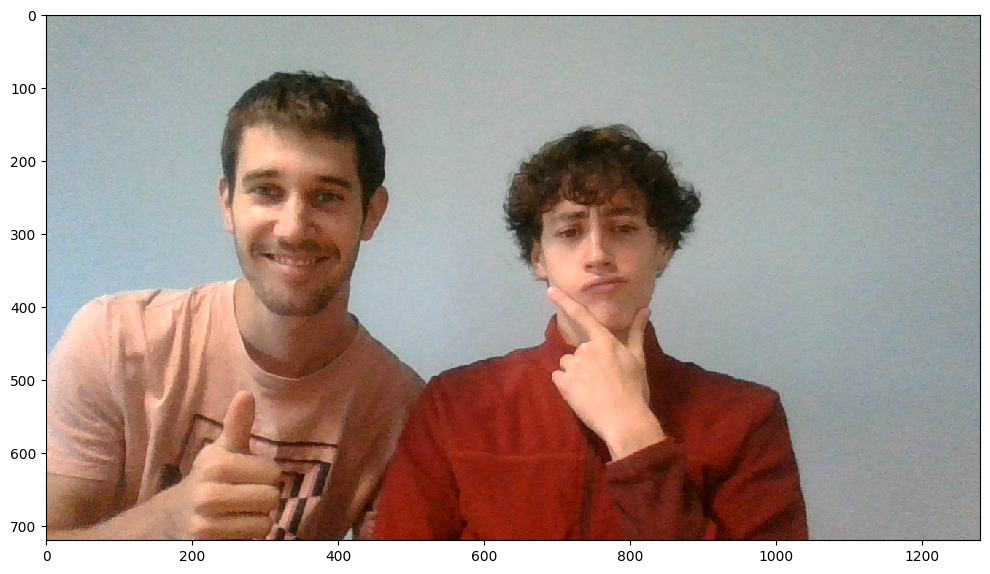

In [3]:
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I2) # visualize image using imshow function
sk.io.show()

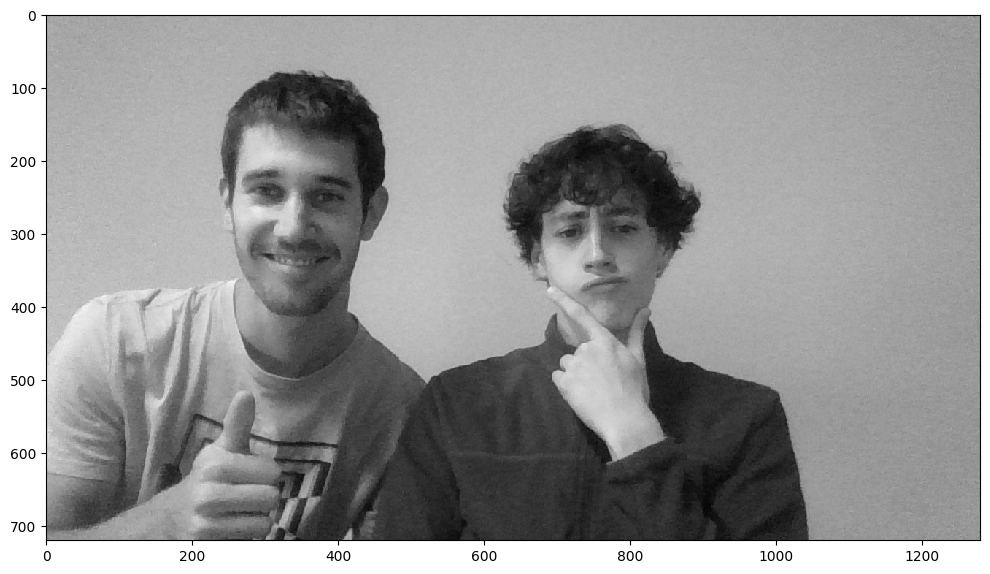

In [4]:
IG = sk.color.rgb2gray(I2)
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IG) # visualize image using imshow function
sk.io.show()

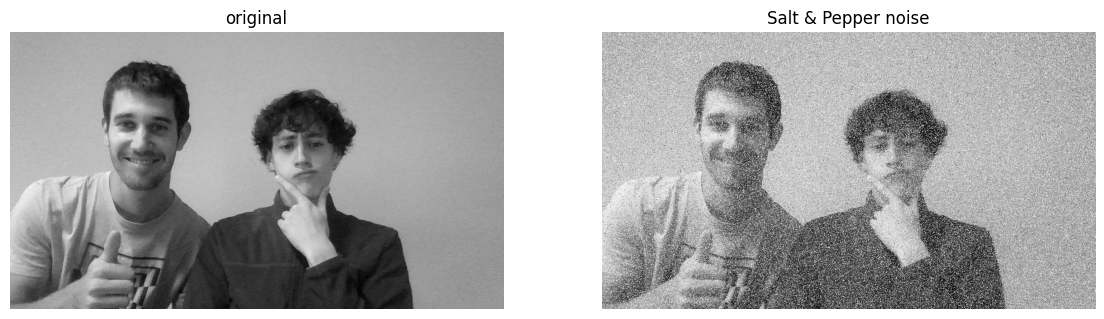

In [22]:
img = IG

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(IG)
noisy_image[noise > 0.8] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')


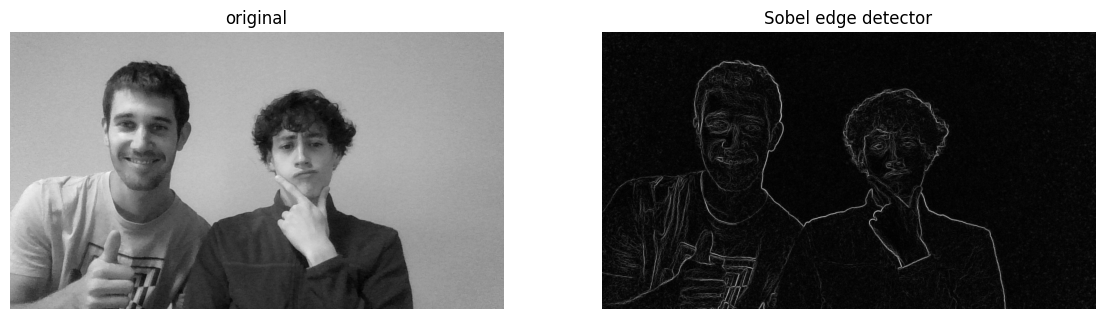

In [25]:
from skimage.filters import roberts, sobel
edge_sobel = sobel(IG)
plot_comparison(IG,edge_sobel, 'Sobel edge detector')

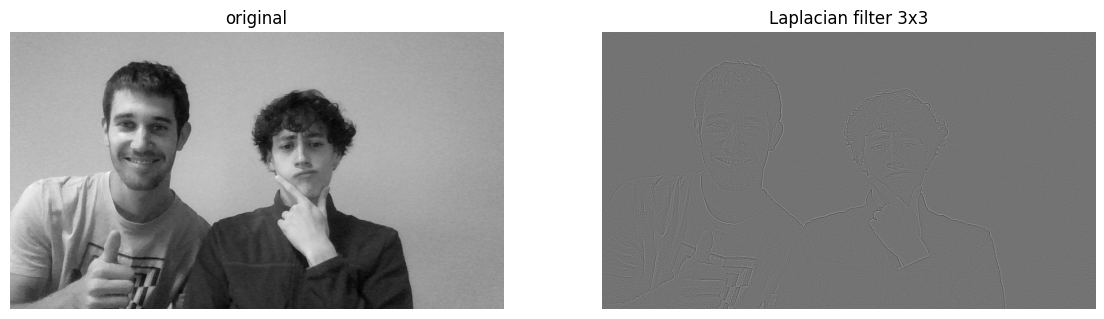

In [27]:
from skimage.filters import laplace
img_f = laplace(IG, 3)
plot_comparison(IG,img_f, 'Laplacian filter 3x3')

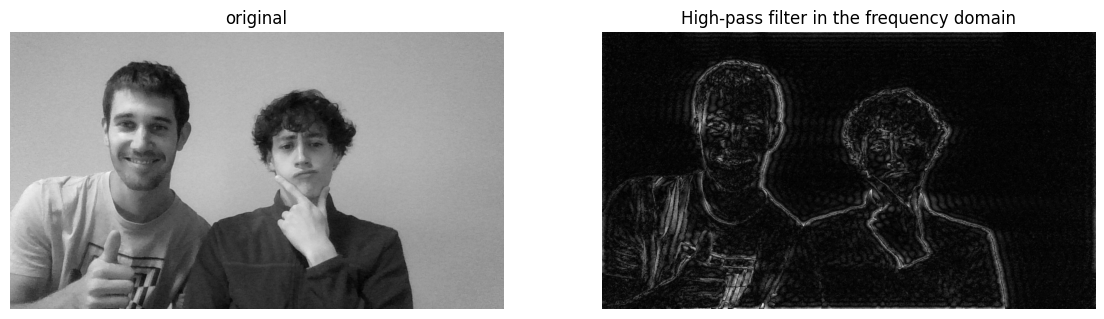

In [33]:
from skimage.color import rgb2gray

img = I2
img = rgb2gray(img)



f = np.fft.fft2(img) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

rows, cols = img.shape
crow, ccol = np.int64(rows/2) , np.int64(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_comparison(img,img_back, 'High-pass filter in the frequency domain')

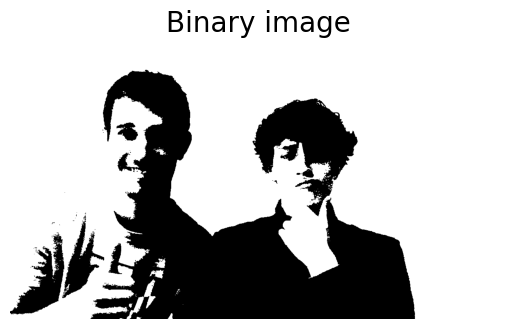

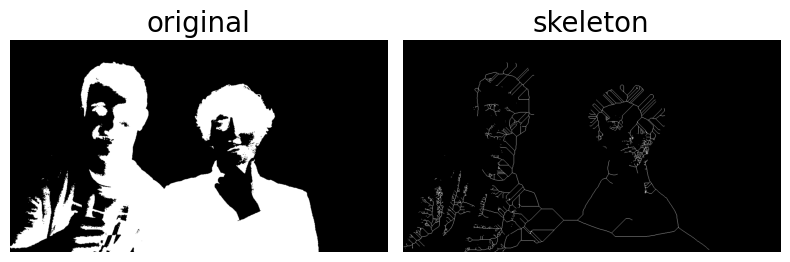

In [56]:
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage.filters import threshold_otsu

image = IG
thresh = threshold_otsu(image)
binary_image = image > thresh

plt.imshow(binary_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Binary image', fontsize=20)
plt.show()

# Invert the horse image
image = invert(binary_image)

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()